# Titanic Challenge

In [1293]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error



## Exploratory Data Analysis

In [1294]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1295]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1296]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


([<matplotlib.patches.Wedge at 0x1e1f2fa65b0>,
 [Text(0.39257483889210154, 1.0275626481479563, 'Survived'),
  Text(-0.3925747426847421, -1.0275626849034607, 'Dead')],
 [Text(0.21413173030478264, 0.5604887171716125, '38.38%'),
  Text(-0.2141316778280411, -0.5604887372200694, '61.62%')])

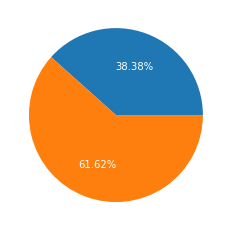

In [1297]:
number_of_survived = len(train[train['Survived'] == 1])
number_of_dead = len(train[train['Survived'] == 0])
plt.pie([number_of_survived, number_of_dead], labels=["Survived", "Dead"], autopct='%1.2f%%', textprops={'color':"w"})


### Data preprocessing

In [1298]:
def clear_data(data: pd.DataFrame):
    cleared = data.drop("Cabin", axis=1)
    cleared.drop("Name", axis=1, inplace=True)
    cleared.drop("Ticket", axis=1, inplace=True)
    cleared.drop("PassengerId", axis=1, inplace=True)
    cleared.dropna(subset=['Embarked'], inplace=True)
    
    return cleared

In [1299]:
def feature_encoding(data: pd.DataFrame):
    data["Sex"] = data["Sex"].astype("category")
    data["Sex"] = data["Sex"].cat.codes
    
    data["Embarked"] = data["Embarked"].astype("category")
    data["Embarked"] = data["Embarked"].cat.codes
    
    return data


In [1300]:
train = clear_data(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [1301]:
train = feature_encoding(train)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [1302]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int8   
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 50.4 KB


<AxesSubplot:>

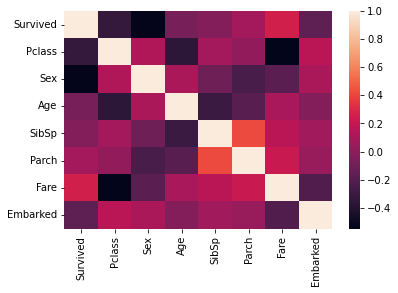

In [1303]:
sns.heatmap(train.corr())

### Feature Engineering


In [1304]:
train_dropped_survived = train.drop("Survived", axis=1)
test_age = train_dropped_survived[train_dropped_survived["Age"].isnull()]
test_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    177 non-null    int64  
 1   Sex       177 non-null    int8   
 2   Age       0 non-null      float64
 3   SibSp     177 non-null    int64  
 4   Parch     177 non-null    int64  
 5   Fare      177 non-null    float64
 6   Embarked  177 non-null    int8   
dtypes: float64(2), int64(3), int8(2)
memory usage: 8.6 KB


In [1305]:
train_age = train_dropped_survived[train_dropped_survived['Age'].notnull()]
train_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int8   
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int8   
dtypes: float64(2), int64(3), int8(2)
memory usage: 34.8 KB


In [1306]:
X_train, X_test, y_train, y_test = train_test_split(train_age.drop("Age", axis=1), train_age["Age"], test_size=0.2)

#### Linear regression model

In [1307]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred)

#### Support Vector Regression

In [1308]:
model_svr = SVR()
model_svr.fit(X_train, y_train)
y_pred = model_svr.predict(X_test)
svr_mse = mean_squared_error(y_test, y_pred)

#### Gradient Boosting Regressor

In [1309]:
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, y_train)
y_pred = model_gbr.predict(X_test)
gbr_mse = mean_squared_error(y_test, y_pred)

#### Decision Tree Regressor

In [1310]:
model_dtr = DecisionTreeRegressor(max_depth=5)
model_dtr.fit(X_train, y_train)
y_pred = model_dtr.predict(X_test)
dtr_mse = mean_squared_error(y_test, y_pred)

Comparison of MSE

In [1311]:
print('Linear MSE:', linear_mse)
print('Decision Tree Regressor MSE:', dtr_mse)
print('Gradient Boosting Regressor MSE:', gbr_mse)
print('SVM MSE:', svr_mse)

Linear MSE: 169.6416792971735
Decision Tree Regressor MSE: 172.89623041156815
Gradient Boosting Regressor MSE: 156.3523417964587
SVM MSE: 203.08566241204798


#### Replacing missing Age values

In [1312]:
age_pred = model_gbr.predict(test_age.drop("Age", axis=1))
print(age_pred.mean())

29.357613424581935


Note: the predicted mean average is close to the mean average of the dataset

In [1313]:
def feature_engineer_age(data_set: pd.DataFrame, model):
    copy = data_set.copy()
    if "Survived" in data_set:
        copy = data_set.drop("Survived", axis=1)
    
    test_age = copy[copy["Age"].isnull()]
    age_pred = model.predict(test_age.drop("Age", axis=1))
    data_set.loc[data_set.isnull().any(axis=1), "Age"] = age_pred

In [1314]:
def feature_engineer_fare(data_set: pd.DataFrame):
    avg = data_set.loc[data_set["Fare"].notnull(), "Fare"].mean()
    data_set.loc[data_set["Fare"].isnull(), "Fare"] = avg

In [1315]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int8   
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 50.4 KB


In [1316]:
feature_engineer_age(train, model_gbr)

In [1317]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int8   
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 50.4 KB


### Model Training

In [1318]:
X_train, X_test, y_train, y_test = train_test_split(train.drop("Survived", axis=1), train["Survived"], test_size=0.2)

#### #1 Support Vector Machine

In [1319]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)

#### #2 Random Forest

In [1320]:
model_rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred)

#### #3 Naive Bayes

In [1321]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred)

In [1322]:
print('SVM accuracy:', accuracy_svm)
print('RFC accuracy:', accuracy_rfc)
print('NB accuracy:', accuracy_nb)

SVM accuracy: 0.7078651685393258
RFC accuracy: 0.8595505617977528
NB accuracy: 0.8426966292134831


### Predicting from test data

In [1323]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1324]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1325]:
processed_test = clear_data(test)
processed_test = feature_encoding(processed_test)
processed_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int8   
dtypes: float64(2), int64(3), int8(2)
memory usage: 20.4 KB


In [1326]:
feature_engineer_fare(processed_test)
processed_test.info()

AVg:  35.6271884892086
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int8   
dtypes: float64(2), int64(3), int8(2)
memory usage: 20.4 KB


In [1327]:
feature_engineer_age(processed_test, model_gbr)
processed_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int8   
dtypes: float64(2), int64(3), int8(2)
memory usage: 20.4 KB


In [1328]:
predictions = model_rfc.predict(processed_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

Score: 0,77751
Leaderboard rank: 3767 out of 14219
Juhúúú!